# Create a Network from a Buffered Coordinate

Create a `networkx` graph from a buffered point.


In [7]:
from cityseer.tools import io


Define a longitude and latitude, and a buffer distance in meters.


In [8]:
lng, lat = -0.13396079424572427, 51.51371088849723
buffer = 500


A geometry can now be created using the [`buffered_point_poly`](https://cityseer.benchmarkurbanism.com/tools/io#buffered-point-poly) function available from the `cityseer` package's `io` module.


4326


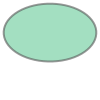

In [9]:
poly_wgs, epsg_code = io.buffered_point_poly(lng, lat, buffer)
print(epsg_code)
poly_wgs

You can then use this geometry to specify the boundaries to be used for creating a network using the [osm_graph_from_poly](https://cityseer.benchmarkurbanism.com/tools/io#osm-graph-from-poly) function.


In [10]:
G = io.osm_graph_from_poly(poly_wgs)
print(G)

INFO:cityseer.tools.io:Converting networkX graph from EPSG code 4326 to EPSG code 32630.
INFO:cityseer.tools.io:Processing node x, y coordinates.
100%|██████████| 2927/2927 [00:00<00:00, 1018900.14it/s]
INFO:cityseer.tools.io:Processing edge geom coordinates, if present.
100%|██████████| 3158/3158 [00:00<00:00, 2060291.19it/s]
INFO:cityseer.tools.graphs:Generating interpolated edge geometries.
100%|██████████| 3158/3158 [00:00<00:00, 124461.93it/s]
INFO:cityseer.tools.graphs:Removing filler nodes.
100%|██████████| 2927/2927 [00:00<00:00, 31433.57it/s]
INFO:cityseer.tools.util:Creating edges STR tree.
100%|██████████| 1726/1726 [00:00<00:00, 15150.73it/s]
INFO:cityseer.tools.graphs:Removing filler nodes.
100%|██████████| 1122/1122 [00:00<00:00, 228791.34it/s]
INFO:cityseer.tools.graphs:Removing dangling nodes.
INFO:cityseer.tools.graphs:Removing filler nodes.
100%|██████████| 1318/1318 [00:00<00:00, 1692100.60it/s]
INFO:cityseer.tools.util:Creating edges STR tree.
100%|██████████| 1074/

MultiGraph with 320 nodes and 487 edges


Set the `projected` parameter to `True` if you would rather use the local UTM projection for the boundary.


32630


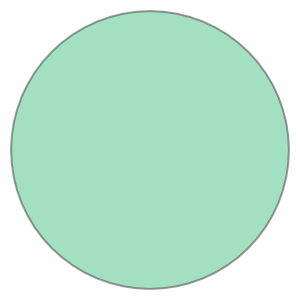

In [11]:
poly_utm, epsg_code = io.buffered_point_poly(lng, lat, buffer, projected=True)
print(epsg_code)
poly_utm

In this case, remember to set the `poly_crs` parameter to the appropriate UTM CRS if using the resultant geometry as a parameter for the [osm_graph_from_poly](https://cityseer.benchmarkurbanism.com/tools/io#osm-graph-from-poly) function.


In [12]:
G_utm = io.osm_graph_from_poly(poly_utm, poly_crs_code=epsg_code)
print(G_utm)

INFO:cityseer.tools.io:Converting networkX graph from EPSG code 4326 to EPSG code 32630.
INFO:cityseer.tools.io:Processing node x, y coordinates.
100%|██████████| 2927/2927 [00:00<00:00, 939665.35it/s]
INFO:cityseer.tools.io:Processing edge geom coordinates, if present.
100%|██████████| 3158/3158 [00:00<00:00, 2344356.11it/s]
INFO:cityseer.tools.graphs:Generating interpolated edge geometries.
100%|██████████| 3158/3158 [00:00<00:00, 119706.21it/s]
INFO:cityseer.tools.graphs:Removing filler nodes.
100%|██████████| 2927/2927 [00:00<00:00, 31357.14it/s]
INFO:cityseer.tools.util:Creating edges STR tree.
100%|██████████| 1726/1726 [00:00<00:00, 14862.67it/s]
INFO:cityseer.tools.graphs:Removing filler nodes.
100%|██████████| 1122/1122 [00:00<00:00, 218843.43it/s]
INFO:cityseer.tools.graphs:Removing dangling nodes.
INFO:cityseer.tools.graphs:Removing filler nodes.
100%|██████████| 1318/1318 [00:00<00:00, 1683341.25it/s]
INFO:cityseer.tools.util:Creating edges STR tree.
100%|██████████| 1074/1

MultiGraph with 320 nodes and 487 edges
